In [1]:
import pandas as pd
import io
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/2021-2 AI&SE/AI/dataset/ESG_Home.csv'

In [4]:
data = pd.read_csv(path)
data.head()

,gender,age,occupation,shower duration,sleeping time,shower time,month,temperature,reduction
0,0,0,0,14,20,19,10,15.1,252
1,0,0,0,14,21,20,2,3.4,252
2,0,0,0,13,21,19,11,8.5,234
3,0,0,0,11,22,20,2,3.4,198
4,0,0,0,11,20,18,9,21.3,198


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49028 entries, 0 to 49027
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           49028 non-null  int64  
 1   age              49028 non-null  int64  
 2   occupation       49028 non-null  int64  
 3   shower duration  49028 non-null  int64  
 4   sleeping time    49028 non-null  int64  
 5   shower time      49028 non-null  int64  
 6   month            49028 non-null  int64  
 7   temperature      49028 non-null  float64
 8   reduction        49028 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 3.4 MB


In [6]:
data.corr()

,gender,age,occupation,shower duration,sleeping time,shower time,month,temperature,reduction
gender,1.000000,0.026882,0.011564,0.591143,-0.014007,-0.013839,-0.002892,-0.003229,0.746108
age,0.026882,1.000000,0.658547,0.131954,0.265023,0.263132,0.003362,0.004449,-0.301393
occupation,0.011564,0.658547,1.000000,-0.066770,0.454868,0.453598,0.001817,0.003609,-0.096643
shower duration,0.591143,0.131954,-0.066770,1.000000,-0.248066,-0.249130,-0.005199,-0.005753,0.418175
sleeping time,-0.014007,0.265023,0.454868,-0.248066,1.000000,0.996131,0.002320,0.006955,0.189581
shower time,-0.013839,0.263132,0.453598,-0.249130,0.996131,1.000000,0.002482,0.006616,0.190153
month,-0.002892,0.003362,0.001817,-0.005199,0.002320,0.002482,1.000000,0.238787,-0.002046
temperature,-0.003229,0.004449,0.003609,-0.005753,0.006955,0.006616,0.238787,1.000000,-0.000788
reduction,0.746108,-0.301393,-0.096643,0.418175,0.189581,0.190153,-0.002046,-0.000788,1.000000


In [7]:
data['reduction'].value_counts()

240    2865
48     2497
36     2460
360    2414
60     2367
       ... 
108     149
138     141
96      141
156     140
162     132
Name: reduction, Length: 61, dtype: int64

## Main Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,6))
%matplotlib inline

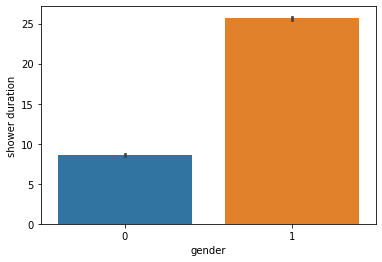

In [ ]:
sns.barplot(x='gender', y='shower duration', data=data)

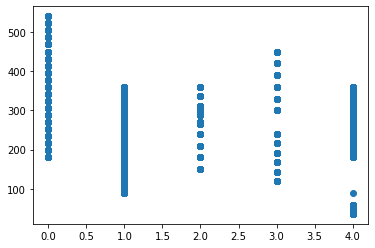

In [ ]:
x = data.age
y = data.reduction

plt.scatter(x,y)

In [8]:
X = data.drop(['reduction'], axis=1)
y = data['reduction']

In [9]:
from sklearn.model_selection import train_test_split

X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print(X_train_all.shape) 
print(X_test.shape)
print(y_train_all.shape)
print(y_test.shape)

(39222, 8)
(9806, 8)
(39222,)
(9806,)


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=13)
print(X_train.shape) 
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(31377, 8)
(7845, 8)
(31377,)
(7845,)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train, y_train)
y_pred_linr = linr.predict(X_test)

In [ ]:
print('Linear Regression performance result')
print('--------------------------------------------')
print('r2 score :', r2_score(y_test,y_pred_linr))
print('MAE score :', mean_absolute_error(y_test,y_pred_linr))
print('RMSE score :', np.sqrt(mean_squared_error(y_test,y_pred_linr)))

Linear Regression performance result
--------------------------------------------
r2 score : 0.7712810353322093
MAE score : 45.71471893459646
RMSE score : 56.517131108962985


In [ ]:
linr.coef_

array([ 76.55176552, -56.19668381,   8.13177591,  21.67010295,
        23.37373377,  16.53651045,  -0.16411968,   0.2885103 ])

# SGD Regression

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state=13, penalty='l1')
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)

NameError: ignored

In [ ]:
print('SGD Regression performance result')
print('--------------------------------------------')
print('r2 score :', r2_score(y_test,y_pred_sgd))
print('MAE score :',mean_absolute_error(y_test,y_pred_sgd))
print('RMSE score :',np.sqrt(mean_squared_error(y_test,y_pred_sgd)))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=13, max_iter=2000, dual=False)
logr.fit(X_train, y_train)
y_pred_logr = logr.predict(X_test)

In [ ]:
print('Logistic Regression performance result')
print('--------------------------------------------')
print('r2 score :', r2_score(y_test,y_pred_logr))
print('MAE score :',mean_absolute_error(y_test,y_pred_logr))
print('RMSE score :',np.sqrt(mean_squared_error(y_test,y_pred_logr)))

Logistic Regression performance result
--------------------------------------------
r2 score : 0.80299867007376
MAE score : 35.09137262900265
RMSE score : 52.452186787944754


In [ ]:
logr.coef_[0]

array([ 7.16608350e-03,  9.95905850e+00,  6.13769687e-01, -4.02929707e+01,
       -3.90946105e+00, -3.41704285e+00,  3.59444307e-02,  8.95563961e-03])

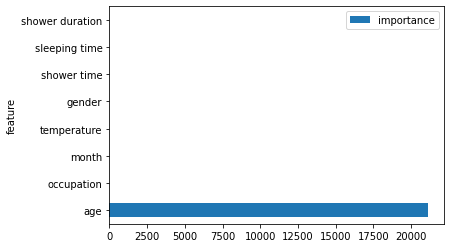

In [ ]:
import math
w0 = logr.intercept_[0]
w = w1, w2, w3, w4, w5, w6, w7, w8 = logr.coef_[0]
feature_names = ["gender", "age", "occupation", "shower duration", "sleeping time", "shower time", "month",	"temperature"]
feature_imp = pd.DataFrame(feature_names, columns=["feature"])
feature_imp["importance"] = pow(math.e, w)
feature_imp = feature_imp.sort_values(by=["importance"], ascending=False)
ax=feature_imp.plot.barh(x='feature', y='importance')

# RandomForest Regression

In [13]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=13)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

In [14]:
print('RandomForest Regression performance result')
print('--------------------------------------------')
print('r2 score :', r2_score(y_test,y_pred_rfr))
print('MAE score :',mean_absolute_error(y_test,y_pred_rfr))
print('RMSE score :',np.sqrt(mean_squared_error(y_test,y_pred_rfr)))

RandomForest Regression performance result
--------------------------------------------
r2 score : 1.0
MAE score : 0.0
RMSE score : 0.0


No handles with labels found to put in legend.


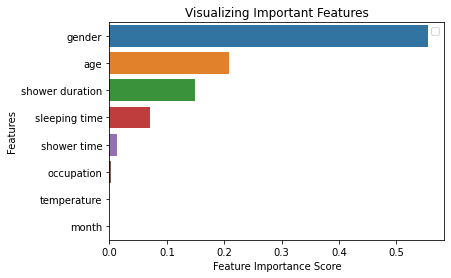

In [15]:
feature_imp = pd.Series(rfr.feature_importances_, index=X.columns).sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

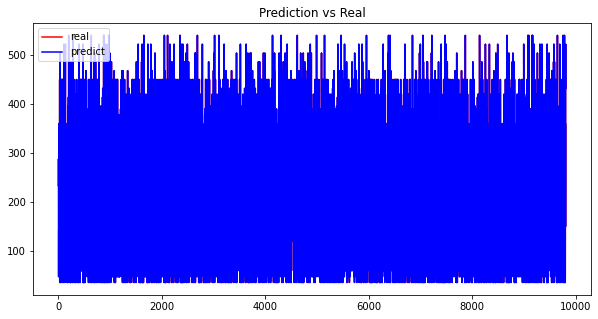

<Figure size 720x360 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)
epochs = range(len(y_test))

plt.plot(epochs, y_test, 'r', label='real')
plt.plot(epochs, y_pred_rfr, 'b', label='predict')

plt.title('Prediction vs Real')
plt. legend()

plt.figure()

plt.show()

# ExtraTree Regression

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(random_state = 13)
etr.fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)

In [18]:
print('ExtraTree Regression performance result')
print('--------------------------------------------')
print('r2 score :', r2_score(y_test,y_pred_etr))
print('MAE score :',mean_absolute_error(y_test,y_pred_etr))
print('RMSE score :',np.sqrt(mean_squared_error(y_test,y_pred_etr)))

ExtraTree Regression performance result
--------------------------------------------
r2 score : 1.0
MAE score : 0.0
RMSE score : 0.0


No handles with labels found to put in legend.


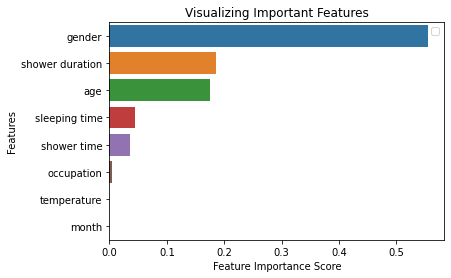

In [19]:
feature_imp = pd.Series(etr.feature_importances_, index=X.columns).sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

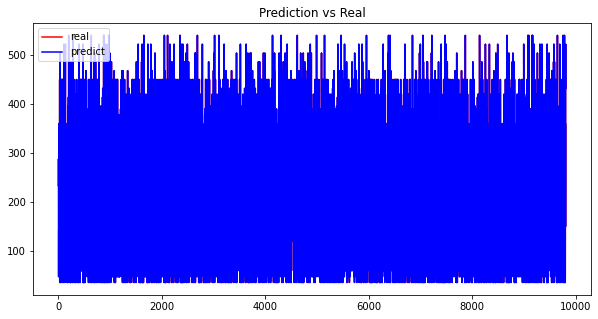

<Figure size 720x360 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)
epochs = range(len(y_test))

plt.plot(epochs, y_test, 'r', label='real')
plt.plot(epochs, y_pred_etr, 'b', label='predict')

plt.title('Prediction vs Real')
plt. legend()

plt.figure()

plt.show()

# GradientBoosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=13)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

In [ ]:
print('GradientBoosting Regression performance result')
print('--------------------------------------------')
print('r2 score :', r2_score(y_test,y_pred_gbr))
print('MAE score :',mean_absolute_error(y_test,y_pred_gbr))
print('RMSE score :',np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

GradientBoosting Regression performance result
--------------------------------------------
r2 score : 0.9928942096298268
MAE score : 5.583752736760537
RMSE score : 9.961740301130831


# AdaBoost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adab = AdaBoostRegressor(random_state=13)
adab_fit = adab.fit(X_train, y_train)
y_pred_adab = adab.predict(X_test)

In [ ]:
print('AdaBoost Regression performance result')
print('--------------------------------------------')
print('r2 score :', r2_score(y_test,y_pred_adab))
print('MAE score :',mean_absolute_error(y_test,y_pred_adab))
print('RMSE score :',np.sqrt(mean_squared_error(y_test,y_pred_adab)))

AdaBoost Regression performance result
--------------------------------------------
r2 score : 0.9168099401732435
MAE score : 27.045350645957686
RMSE score : 34.08511302234777


In [ ]:
adab.estimators_

[DecisionTreeRegressor(max_depth=3, random_state=1192722770),
 DecisionTreeRegressor(max_depth=3, random_state=293509224),
 DecisionTreeRegressor(max_depth=3, random_state=771045029),
 DecisionTreeRegressor(max_depth=3, random_state=2045636143),
 DecisionTreeRegressor(max_depth=3, random_state=321799632),
 DecisionTreeRegressor(max_depth=3, random_state=47574009),
 DecisionTreeRegressor(max_depth=3, random_state=1118395431),
 DecisionTreeRegressor(max_depth=3, random_state=1386800205),
 DecisionTreeRegressor(max_depth=3, random_state=1552036386),
 DecisionTreeRegressor(max_depth=3, random_state=18509065),
 DecisionTreeRegressor(max_depth=3, random_state=293135913),
 DecisionTreeRegressor(max_depth=3, random_state=610298250),
 DecisionTreeRegressor(max_depth=3, random_state=1246155911),
 DecisionTreeRegressor(max_depth=3, random_state=417463482),
 DecisionTreeRegressor(max_depth=3, random_state=445335166),
 DecisionTreeRegressor(max_depth=3, random_state=478010109),
 DecisionTreeRegress

No handles with labels found to put in legend.


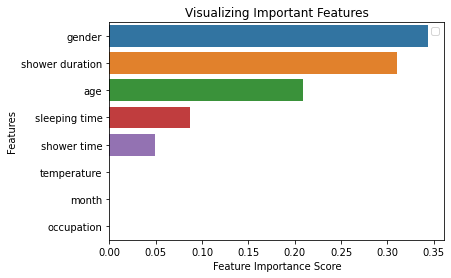

In [ ]:
feature_imp = pd.Series(adab.feature_importances_, index=X.columns).sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# XGB Regression

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(randomstate=13)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

[15:32:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print('XGB Regression performance result')
print('--------------------------------------------')
print('r2 score :', r2_score(y_test,y_pred_xgb))
print('MAE score :',mean_absolute_error(y_test,y_pred_xgb))
print('RMSE score :',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

XGB Regression performance result
--------------------------------------------
r2 score : 0.993290642555953
MAE score : 5.876625236481665
RMSE score : 9.67986911195803


No handles with labels found to put in legend.


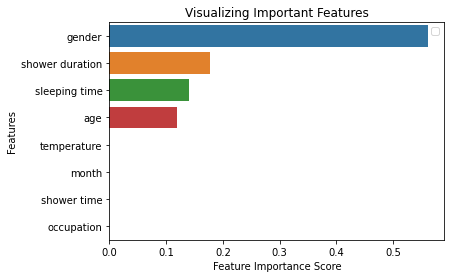

In [ ]:
feature_imp = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

validation

In [ ]:
y_val_xgb = xgb.predict(X_val)
r2_score(y_val, y_val_xgb)

0.9927757723804366

sample test

In [ ]:
path='/content/drive/MyDrive/2021-2 AI&SE/AI/dataset/test1.csv'
test_data = pd.read_csv(path)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   gender           1 non-null      int64
 1   age              1 non-null      int64
 2   occupation       1 non-null      int64
 3   shower duration  1 non-null      int64
 4   sleeping time    1 non-null      int64
 5   shower time      1 non-null      int64
 6   month            1 non-null      int64
 7   temperature      1 non-null      int64
dtypes: int64(8)
memory usage: 192.0 bytes


In [ ]:
test_data = scaler.transform(test_data)

In [ ]:
result=xgb.predict(test_data)

# LGBM Regression

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state = 13)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

In [ ]:
print('LGBM Regression performance result')
print('--------------------------------------------')
print('r2 score :', r2_score(y_test,y_pred_lgbm))
print('MAE score :',mean_absolute_error(y_test,y_pred_lgbm))
print('RMSE score :',np.sqrt(mean_squared_error(y_test,y_pred_lgbm)))

LGBM Regression performance result
--------------------------------------------
r2 score : 0.9999990470818714
MAE score : 0.07450701112463899
RMSE score : 0.11536041632356944


# HistGradientBoosting Regression

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
hgb = HistGradientBoostingRegressor(random_state=13)
hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [ ]:
print('HistGradientBoosting Regression performance result')
print('--------------------------------------------')
print('r2 score :', r2_score(y_test,y_pred_hgb))
print('MAE score :',mean_absolute_error(y_test,y_pred_hgb))
print('RMSE score :',np.sqrt(mean_squared_error(y_test,y_pred_hgb)))

HistGradientBoosting Regression performance result
--------------------------------------------
r2 score : 0.9999988930499437
MAE score : 0.08028555215065038
RMSE score : 0.12433489543380788


In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(hgb, X_train, y_train, n_repeats=20, random_state=13)
result.importances_mean

array([4.66865833e-01, 3.74033959e-01, 6.12470068e-07, 7.94953578e-01,
       9.21139395e-01, 1.77969384e-06, 3.96778019e-08, 2.24157315e-06])

No handles with labels found to put in legend.


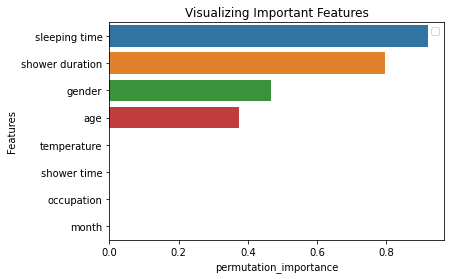

In [ ]:
permutation_importance = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.barplot(x=permutation_importance, y=permutation_importance.index)

plt.xlabel('permutation_importance')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()